<a href="https://colab.research.google.com/github/chivunira/ANN_prediction_model/blob/master/Ann_prediction_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt
from numpy.polynomial.polynomial import Polynomial

In [3]:
# load the dataset
from google.colab import drive
drive.mount('/content/drive')

# Path to the dataset
file_path = '/content/drive/My Drive/Lab_3_Dataset.csv'

# Read the dataset, skipping the first 4 lines
data = pd.read_csv(file_path)

#display the first few rows of the dataset
data.head()


Mounted at /content/drive


,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,Aruba,ABW,"Population, total",SP.POP.TOTL,54608.0,55811.0,56682.0,57475.0,58178.0,58782.0,...,103594.0,104257.0,104874.0,105439.0,105962.0,106442.0,106585.0,106537.0,106445.0,NaN
1,Africa Eastern and Southern,AFE,"Population, total",SP.POP.TOTL,130692579.0,134169237.0,137835590.0,141630546.0,145605995.0,149742351.0,...,583651101.0,600008424.0,616377605.0,632746570.0,649757148.0,667242986.0,685112979.0,702977106.0,720859132.0,NaN
2,Afghanistan,AFG,"Population, total",SP.POP.TOTL,8622466.0,8790140.0,8969047.0,9157465.0,9355514.0,9565147.0,...,32716210.0,33753499.0,34636207.0,35643418.0,36686784.0,37769499.0,38972230.0,40099462.0,41128771.0,NaN
3,Africa Western and Central,AFW,"Population, total",SP.POP.TOTL,97256290.0,99314028.0,101445032.0,103667517.0,105959979.0,108336203.0,...,397855507.0,408690375.0,419778384.0,431138704.0,442646825.0,454306063.0,466189102.0,478185907.0,490330870.0,NaN
4,Angola,AGO,"Population, total",SP.POP.TOTL,5357195.0,5441333.0,5521400.0,5599827.0,5673199.0,5736582.0,...,27128337.0,28127721.0,29154746.0,30208628.0,31273533.0,32353588.0,33428486.0,34503774.0,35588987.0,NaN


In [4]:
# inspect dataset
# check for missing values
missing_values = data.isnull().sum()

# Get list of columns
columns = data.columns

# Filter the dataset for Afghanistan
afghanistan_data = data[data['Country Name'] == 'Afghanistan']

# Display the Afghanistan data
afghanistan_data

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
2,Afghanistan,AFG,"Population, total",SP.POP.TOTL,8622466.0,8790140.0,8969047.0,9157465.0,9355514.0,9565147.0,...,32716210.0,33753499.0,34636207.0,35643418.0,36686784.0,37769499.0,38972230.0,40099462.0,41128771.0,NaN


In [5]:
# convert year columns to numeric types
years = afghanistan_data.columns[4:]  # Starting from the 5th column which are years
afghanistan_data.loc[:, years] = afghanistan_data.loc[:, years].apply(pd.to_numeric, errors='coerce')

# handling missing values
afghanistan_data.loc[:, years] = afghanistan_data.loc[:, years].interpolate(axis=1)

#drop all columns that are completely empty
afghanistan_data = afghanistan_data.dropna(axis=1, how='all')

#display cleaned Afghanistan data
afghanistan_data

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
2,Afghanistan,AFG,"Population, total",SP.POP.TOTL,8622466.0,8790140.0,8969047.0,9157465.0,9355514.0,9565147.0,...,32716210.0,33753499.0,34636207.0,35643418.0,36686784.0,37769499.0,38972230.0,40099462.0,41128771.0,41128771.0


In [6]:
# feature selection
years = afghanistan_data.columns[4:]
population = afghanistan_data.iloc[0, 4:]

# convert into a df
data_df = pd.DataFrame({'Year': years, 'Population': population})

# Ensure yr column is numeric
data_df['Year'] = pd.to_numeric(data_df['Year'])
data_df['Population'] = pd.to_numeric(data_df['Population'])

#display data
data_df

,Year,Population
1960,1960,8622466.0
1961,1961,8790140.0
1962,1962,8969047.0
1963,1963,9157465.0
1964,1964,9355514.0
...,...,...
2019,2019,37769499.0
2020,2020,38972230.0
2021,2021,40099462.0
2022,2022,41128771.0


In [7]:
# split into train and test sets
X = data_df['Year'].values.reshape(-1, 1)
y = data_df['Population'].values

#ensure X and y are numeric
X = X.astype(np.float64)
y = y.astype(np.float64)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [8]:
# Normalize the data
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()
X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)
y_train_scaled = scaler_y.fit_transform(y_train.reshape(-1, 1))
y_test_scaled = scaler_y.transform(y_test.reshape(-1, 1))


In [9]:
# build and train the ANN model
model = Sequential()
model.add(Dense(64, input_dim=1, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(1))

# compile the model
model.compile(loss='mean_squared_error', optimizer='adam')

# train the model
model.fit(X_train_scaled, y_train_scaled, epochs=52, batch_size=10, validation_split=0.2, verbose=1)

Epoch 1/52
4/4 [==============================] - 2s 134ms/step - loss: 0.1464 - val_loss: 0.0823
Epoch 2/52
4/4 [==============================] - 0s 30ms/step - loss: 0.0788 - val_loss: 0.0476
Epoch 3/52
4/4 [==============================] - 0s 53ms/step - loss: 0.0445 - val_loss: 0.0360
Epoch 4/52
4/4 [==============================] - 0s 24ms/step - loss: 0.0345 - val_loss: 0.0353
Epoch 5/52
4/4 [==============================] - 0s 25ms/step - loss: 0.0368 - val_loss: 0.0370
Epoch 6/52
4/4 [==============================] - 0s 22ms/step - loss: 0.0375 - val_loss: 0.0349
Epoch 7/52
4/4 [==============================] - 0s 20ms/step - loss: 0.0353 - val_loss: 0.0304
Epoch 8/52
4/4 [==============================] - 0s 23ms/step - loss: 0.0310 - val_loss: 0.0265
Epoch 9/52
4/4 [==============================] - 0s 22ms/step - loss: 0.0279 - val_loss: 0.0243
Epoch 10/52
4/4 [==============================] - 0s 24ms/step - loss: 0.0266 - val_loss: 0.0225
Epoch 11/52
4/4 [===========

In [10]:
# Evaluation of the model
loss = model.evaluate(X_test_scaled, y_test_scaled)
print(f'Test Loss: {loss}')

# Make predictions for the test data
predictions_test_scaled = model.predict(X_test_scaled)

# Inverse transform the predictions to original scale
predictions_test = scaler_y.inverse_transform(predictions_test_scaled)

# Predict the population for the next 5 years
last_year = int(data_df['Year'].max())
next_years = np.array([last_year + i for i in range(1, 6)]).reshape(-1, 1)
next_years_scaled = scaler_X.transform(next_years)
predictions_next_5_years_scaled = model.predict(next_years_scaled)
predictions_next_5_years = scaler_y.inverse_transform(predictions_next_5_years_scaled)

# Prepare data for plotting
years_test = X_test.flatten()
years_next_5 = next_years.flatten()
actual_population_test = y_test

# Combine test data and next 5 years data for plotting
all_years = np.concatenate((years_test, years_next_5))
all_predictions = np.concatenate((predictions_test.flatten(), predictions_next_5_years.flatten()))


1/1 [==============================] - 0s 26ms/step - loss: 0.0013
Test Loss: 0.0013496571918949485
1/1 [==============================] - 0s 20ms/step


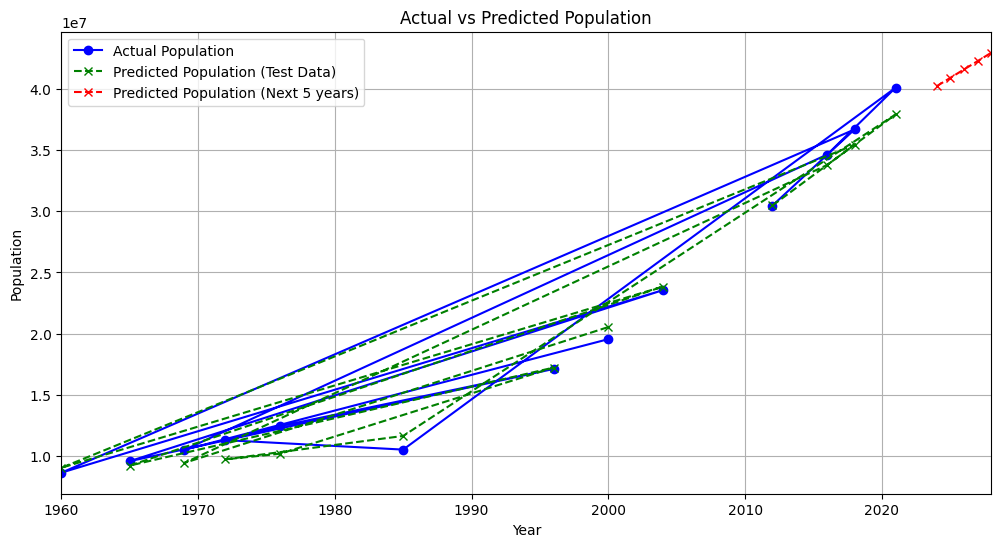

In [14]:
# Plot results
plt.figure(figsize=(12, 6))

# Plot actual values
plt.plot(years_test, actual_population_test, label='Actual Population', color='blue', marker='o')

# Plot predicted values for the test data
plt.plot(years_test, predictions_test, label='Predicted Population (Test Data)', color='green', linestyle='dashed', marker='x')

# Plot predicted values for the next 5 years
plt.plot(years_next_5, predictions_next_5_years, label='Predicted Population (Next 5 years)', color='red', linestyle='dashed', marker='x')

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Population')
plt.title('Actual vs Predicted Population')
plt.legend()
plt.grid(True)

# Set x-axis limits to start from 1960
plt.xlim([1960, last_year + 5])

# Display the plot
plt.show()